In [16]:
# In this notebook I will make the EOS sets used in the project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import EOS_extension # the python script I wrote to extend the EOS

In [22]:
EOS_small = pd.read_table('data/EOSCEFTVE1.dat', header=None).to_numpy() #the low density EOS we are extending
print(EOS_small.shape)

(1650, 3)


We will create several sets of each extension type by varrying the number of segments of density we sample. We will create 1000 EOSs for each. For the speed of sound extension we will do 5 segments (cs5) and 10 segments (cs10). For the polytropic extensions we will make sets of 3 segments (poly3) and 5 segments (poly5).

In [38]:
#cs5
nsamp = 5

cs5_test = EOS_extension.extend(EOS_small, nsamp, ext_type='cs')
np.save('data/cs5test',cs5_test)

Text(0, 0.5, 'Pressure (MeV/fm^3)')

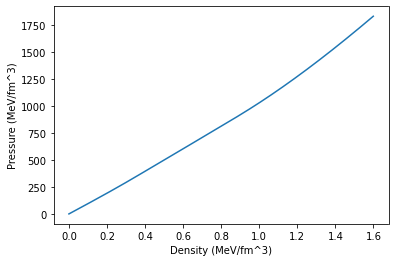

In [14]:
plt.plot(cs5_test[:,0], cs5_test[:,2], label='Linear in c_s')
plt.xlabel('Density (MeV/fm^3)')
plt.ylabel('Pressure (MeV/fm^3)')

In [29]:
nsim = 1000
nsamp = 5
shape_EOS = (cs5_test.shape[0], cs5_test.shape[1], nsim)

cs5 = np.zeros(shape_EOS)

for i in range(nsim):
    cs5[:,:,i] = EOS_extension.extend(EOS_small, nsamp, ext_type='cs')
    
np.save('data/cs5EOS',cs5)

In [30]:
nsamp = 10
cs10 = np.zeros(shape_EOS)

for i in range(nsim):
    cs10[:,:,i] = EOS_extension.extend(EOS_small, nsamp, ext_type='cs')
    
np.save('data/cs10EOS',cs10)

In [36]:
nsamp = 3
poly3 = np.zeros(shape_EOS)

for i in range(nsim):
    poly3[:,:,i] , _  = EOS_extension.extend(EOS_small, nsamp, ext_type='polytrop')
    
np.save('data/poly3EOS',poly3)

In [37]:
nsamp = 5
poly5 = np.zeros(shape_EOS)

for i in range(nsim):
    poly5[:,:,i], _ = EOS_extension.extend(EOS_small, nsamp, ext_type='polytrop')
    
np.save('data/poly5EOS',poly5)